In [236]:
import pandas as pd
import numpy as np

In [237]:
df = pd.read_csv('train1.csv') 

In [353]:
print(df.head())

   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 0.0                 0.0      8370  
1                 6.0                14.0     15200  
2                 0.0                 0.0   

In [239]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65499 entries, 0 to 65498
Data columns (total 12 columns):
User_ID                       65499 non-null int64
Product_ID                    65499 non-null object
Gender                        65499 non-null object
Age                           65499 non-null object
Occupation                    65499 non-null int64
City_Category                 65499 non-null object
Stay_In_Current_City_Years    65499 non-null object
Marital_Status                65499 non-null int64
Product_Category_1            65499 non-null int64
Product_Category_2            44908 non-null float64
Product_Category_3            19886 non-null float64
Purchase                      65499 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 6.0+ MB
None


In [354]:
# From examing data in previous two lines it is evident that there is missing values in  
# columns Product_Category_2, and Product_Category_3
# The Below script iterates through the columns of the dataframe, locates null values, 
# And sums all instances of a null value. If the column contains at least one null value
# Then it sets all instances of the Nan value to 0

for column in df:
    isnul = df[column].isnull()
    totalNull = sum(isnul)
    if totalNull != 0:
        df[column][isnul] = 0
        isnul = df[column].isnull()
        totalNull = sum(isnul)

In [357]:
# Quick check that Nan values have been replaced with 0
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65499 entries, 0 to 65498
Data columns (total 12 columns):
User_ID                       65499 non-null int64
Product_ID                    65499 non-null object
Gender                        65499 non-null object
Age                           65499 non-null object
Occupation                    65499 non-null int64
City_Category                 65499 non-null object
Stay_In_Current_City_Years    65499 non-null object
Marital_Status                65499 non-null int64
Product_Category_1            65499 non-null int64
Product_Category_2            65499 non-null float64
Product_Category_3            65499 non-null float64
Purchase                      65499 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 6.0+ MB


In [358]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Example of hot one encoding 

[How To Hot One Encode Sequence Data In Python](https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python// "Title")

In [359]:
# The next four sections of code are from an online example on how to hot one encode data
# I learned how this code works by running each section and then in later rows apply it to my data
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data)
print(values)
print(type(values))

['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']
<class 'numpy.ndarray'>


In [360]:
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

[0 0 2 0 1 1 2 0 2 1]


In [361]:
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]]


In [362]:
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['cold']


# Hot One Encoding My Data Based On the Example

## Hot One Encoding Gender

In [363]:
# Define an array containing gender column data from df
gender = array(df['Gender']) 

In [364]:
# integer encode the gender data from the gender array
label_encoder = LabelEncoder()
gender_integer_encoded = label_encoder.fit_transform(gender)
print(gender_integer_encoded)

[0 0 0 ..., 1 1 1]


In [365]:
# binary encode the gender data from the integer encoded data
onehot_encoder = OneHotEncoder(sparse=False)
gender_integer_encoded = gender_integer_encoded.reshape(len(gender_integer_encoded), 1)
gender_onehot_encoded = onehot_encoder.fit_transform(gender_integer_encoded)
print(gender_onehot_encoded)
print(type(gender_onehot_encoded))

[[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 ..., 
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]
<class 'numpy.ndarray'>


In [370]:
# Converts the hot one encoded data into a dataframe with columns 'F' for female and 'M' for male
dfGender = pd.DataFrame(data=gender_onehot_encoded, columns=['F','M'])
#print(dfGender)

## Hot One Encoding Age

In [371]:
# Define an array containing age column data from df
ageArray = array(df['Age'])

In [372]:
# integer encode the gender data from the age array
label_encoder = LabelEncoder()
age_integer_encoded = label_encoder.fit_transform(ageArray)
print(age_integer_encoded)

[0 0 0 ..., 2 2 2]


In [373]:
# binary encode the age data from the integer encoded data
onehot_encoder = OneHotEncoder(sparse=False)
age_integer_encoded = age_integer_encoded.reshape(len(age_integer_encoded), 1)
age_onehot_encoded = onehot_encoder.fit_transform(age_integer_encoded)
print(age_onehot_encoded)

[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]]


In [374]:
#Creates a set of column titles based on the age range categories
ageColumns = set(df['Age'])
ageColumns = list(ageColumns)
ageColumns.sort()
print(ageColumns)

['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']


In [376]:
# Converts the hot one encoded data into a dataframe with columns created in previous row
dfAge = pd.DataFrame(data=age_onehot_encoded, columns=ageColumns)
#print(dfAge)

## Hot One Encoding Occupation

In [377]:
# Define an array containing occupation column data from df
occupationArray = array(df['Occupation'])
print(occupationArray.max())
print(occupationArray.min())

20
0


In [378]:
# binary encode the occupation data directly because its raw form was integer encoded
onehot_encoder = OneHotEncoder(sparse=False)
occupation_integer_encoded = occupationArray.reshape(len(occupationArray), 1)
occupation_onehot_encoded = onehot_encoder.fit_transform(occupation_integer_encoded)
print(occupation_onehot_encoded)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [379]:
#Creates a set of column titles based on the occupation categories
occupationColumns = set(df['Occupation'])
occupationColumns = list(occupationColumns)
occupationColumns.sort()
hold = []
for item in occupationColumns:
    temp = str(item) + '_Occupation'
    hold.append(temp)

print(type(hold))
print(hold)

<class 'list'>
['0_Occupation', '1_Occupation', '2_Occupation', '3_Occupation', '4_Occupation', '5_Occupation', '6_Occupation', '7_Occupation', '8_Occupation', '9_Occupation', '10_Occupation', '11_Occupation', '12_Occupation', '13_Occupation', '14_Occupation', '15_Occupation', '16_Occupation', '17_Occupation', '18_Occupation', '19_Occupation', '20_Occupation']


In [380]:
# Converts the hot one encoded data into a dataframe with columns created in previous row
dfOccupation = pd.DataFrame(data=occupation_onehot_encoded, columns= hold)
#print(dfOccupation)

## Hot One Encoding City Category

In [381]:
# Define an array containing city category column data from df
city_catArray = array(df['City_Category'])

In [382]:
# integer encode the city category data
label_encoder = LabelEncoder()
city_cat_integer_encoded = label_encoder.fit_transform(city_catArray)
print(city_cat_integer_encoded)

[0 0 0 ..., 0 0 0]


In [383]:
# binary encode the integer encoded data from previous step
city_cat_onehot_encoder = OneHotEncoder(sparse=False)
city_cat_integer_encoded = city_cat_integer_encoded.reshape(len(city_cat_integer_encoded), 1)
city_cat_onehot_encoded = onehot_encoder.fit_transform(city_cat_integer_encoded)
print(city_cat_onehot_encoded)

[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 ..., 
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]]


In [384]:
# creates column names for the city categories
City_Cat_Columns = set(df['City_Category'])
City_Cat_Columns = list(City_Cat_Columns)
City_Cat_Columns.sort()
print(City_Cat_Columns)

['A', 'B', 'C']


In [385]:
# creates a data frame out of the one hot encoded data with column titles created in previous step
dfCityCat = pd.DataFrame(data=city_cat_onehot_encoded, columns=City_Cat_Columns)
#print(dfCityCat)

# Merging Data Frames of One Hot Encoded Data

In [386]:
# creates a single dataframe with the original data frame and all of the hot one encoded data concatenated
df2 = pd.concat([df, dfGender, dfAge, dfOccupation, dfCityCat], axis=1, join='inner')

In [390]:
df2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,14_Occupation,15_Occupation,16_Occupation,17_Occupation,18_Occupation,19_Occupation,20_Occupation,A,B,C
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [388]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65499 entries, 0 to 65498
Data columns (total 45 columns):
User_ID                       65499 non-null int64
Product_ID                    65499 non-null object
Gender                        65499 non-null object
Age                           65499 non-null object
Occupation                    65499 non-null int64
City_Category                 65499 non-null object
Stay_In_Current_City_Years    65499 non-null object
Marital_Status                65499 non-null int64
Product_Category_1            65499 non-null int64
Product_Category_2            65499 non-null float64
Product_Category_3            65499 non-null float64
Purchase                      65499 non-null int64
F                             65499 non-null float64
M                             65499 non-null float64
0-17                          65499 non-null float64
18-25                         65499 non-null float64
26-35                         65499 non-null float64
36-45

# Hot One Encoding Product Category Data

In [391]:
# Pseudo code:
# Create three empty 20 x 49125 array
# Loop over product_cat_x 
# Turns corresponding array value to True 
# Adds three arrays together 

In [392]:
df2.Product_Category_1 = df2.Product_Category_1.astype(int)
#print(trainDf.Product_Category_1)
df2.Product_Category_2 = df2.Product_Category_2.astype(int)
#print(trainDf.Product_Category_2)
df2.Product_Category_3 = df2.Product_Category_3.astype(int)
#print(trainDf.Product_Category_3)

In [393]:
# Creates three empty arrays with equivalent rows as the data frame and 
# Eighteen columns to represent each category of product 
x = []
Product_Category_List = ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']
for i in range(3):
    temp = np.zeros((65499, 18))
    x.append(temp)

print(x)

[array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]]), array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]]), array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])]


In [394]:
# Iterates over each entry in the product category column x and 
# Sets the corresponding entry in the empty array to a 1
y = []

for product_cat, array in zip(Product_Category_List, x):
    print(product_cat)
    for index, entry in enumerate(df2[product_cat][:]):
        #print(str(index) + ": " + str(entry))
        if entry == 0:
            continue
            
        else:
            array[index, (entry-1)] = 1 
            #print(entry, product_cat)
            
    y.append(array)

Product_Category_1
Product_Category_2
Product_Category_3


In [395]:
# Testing values got updated correctly
print(y[1][0:5,:])

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [396]:
# Sums three arrays together to create a single array containing all product category data hot one encoded 
# Converts array to dataframe 
z = sum(y)
z = pd.DataFrame(z)

# Generates map of new names for occupation data based on old names
newNamesZ = []
for i in range(1, 19):
    temp = str(i) + '_Product_Category'
    newNamesZ.append(temp)
   
oldNamesZ = range(19)
dictionary = dict(zip(oldNamesZ, newNamesZ))

print(dictionary)

{0: '1_Product_Category', 1: '2_Product_Category', 2: '3_Product_Category', 3: '4_Product_Category', 4: '5_Product_Category', 5: '6_Product_Category', 6: '7_Product_Category', 7: '8_Product_Category', 8: '9_Product_Category', 9: '10_Product_Category', 10: '11_Product_Category', 11: '12_Product_Category', 12: '13_Product_Category', 13: '14_Product_Category', 14: '15_Product_Category', 15: '16_Product_Category', 16: '17_Product_Category', 17: '18_Product_Category'}


In [397]:
z = z.rename(columns={0: '1_Product_Category', 1: '2_Product_Category', 2: '3_Product_Category', 3: '4_Product_Category', 4: '5_Product_Category', 5: '6_Product_Category', 6: '7_Product_Category', 7: '8_Product_Category', 8: '9_Product_Category', 9: '10_Product_Category', 10: '11_Product_Category', 11: '12_Product_Category', 12: '13_Product_Category', 13: '14_Product_Category', 14: '15_Product_Category', 15: '16_Product_Category', 16: '17_Product_Category', 17: '18_Product_Category'})
print(z)

       1_Product_Category  2_Product_Category  3_Product_Category  \
0                     0.0                 0.0                 1.0   
1                     1.0                 0.0                 0.0   
2                     0.0                 0.0                 0.0   
3                     0.0                 0.0                 0.0   
4                     0.0                 0.0                 0.0   
5                     1.0                 1.0                 0.0   
6                     1.0                 0.0                 0.0   
7                     1.0                 0.0                 0.0   
8                     1.0                 0.0                 0.0   
9                     0.0                 0.0                 0.0   
10                    0.0                 0.0                 0.0   
11                    0.0                 0.0                 0.0   
12                    0.0                 0.0                 0.0   
13                    1.0         

In [398]:
# Combines product data from previous step to trainDf data frame
df2 = pd.concat([df2, z], axis=1, join='inner')

In [401]:
# Renames all other column names with more accurate/description name
df2 = df2.rename(columns={'Purchase':'Purchase_Amount', 'F': 'Female', 'M': 'Male', '0-17': 'Age_0-17', '18-25': 'Age_18-25', '26-35': 'Age_26-35', '36-45': 'Age_36-45', '46-50': 'Age_46-50', '51-55': 'Age_51-55', '55+':'Age_55+', 'A':'City_Category_A', 'B': 'City_Category_B', 'C':'City_Category_C'})

## Split Data into train (75%) and test (25%) data sets


In [402]:
# Creates location markers for splitting the data frame into a train portion and a test portion
trainDataEndLoc = int(len(df2)*.75)
testDataStartLoc = trainDataEndLoc + 1

In [283]:
# Uses location marker to create train data set
trainDf = df2.iloc[0:trainDataEndLoc,:]
print(trainDf.head(10))
print(trainDf.info())

   User_ID Product_ID Gender    Age  Occupation City_Category  \
0  1000001  P00069042      F   0-17          10             A   
1  1000001  P00248942      F   0-17          10             A   
2  1000001  P00087842      F   0-17          10             A   
3  1000001  P00085442      F   0-17          10             A   
4  1000002  P00285442      M    55+          16             C   
5  1000003  P00193542      M  26-35          15             A   
6  1000004  P00184942      M  46-50           7             B   
7  1000004  P00346142      M  46-50           7             B   
8  1000004   P0097242      M  46-50           7             B   
9  1000005  P00274942      M  26-35          20             A   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3           

In [284]:
# Uses location marker to create test data portion
testDf = df2.iloc[0:testDataStartLoc,:]
print(testDf.head(10))
print(testDf.info())

   User_ID Product_ID Gender    Age  Occupation City_Category  \
0  1000001  P00069042      F   0-17          10             A   
1  1000001  P00248942      F   0-17          10             A   
2  1000001  P00087842      F   0-17          10             A   
3  1000001  P00085442      F   0-17          10             A   
4  1000002  P00285442      M    55+          16             C   
5  1000003  P00193542      M  26-35          15             A   
6  1000004  P00184942      M  46-50           7             B   
7  1000004  P00346142      M  46-50           7             B   
8  1000004   P0097242      M  46-50           7             B   
9  1000005  P00274942      M  26-35          20             A   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3           

In [403]:
trainDf.to_csv('trainingDf.csv')
testDf.to_csv('testingDf.csv')

## Feature Engineering and Storytelling

    -Aggregate user data by user 
    -Count # categories user has spent in
	-Product category unique count
    

In [285]:
# Pick a dataset - ideally the dataset for your Capstone. If for some reason you want to do this on a 
# different data set, you can find one on Mode Analytics or Google's public data sets directory, 
# or pick another one you like from elsewhere.

# Get going by asking the following questions and looking for the answers with some code and plots:
# Can you count something interesting?
# Can you find some trends (high, low, increase, decrease, anomalies)?
# Can you make a bar plot or a histogram?
# Can you compare two related quantities?
# Can you make a scatterplot?
# Can you make a time-series plot?
# Having made these plots, what are some insights you get from them? Do you see any correlations? 
# Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask?
# By now you’ve asked a bunch of questions, and found some neat insights. Is there an interesting narrative, 
# a way of presenting the insights using text and plots from the above, that tells a compelling story? 
# As you work out this story, what are some other trends/relationships you think will make it more complete?
# Submission Requirements: Submit links to a Github repository containing a Jupyter notebook. 
# The notebook should contain:
# The questions you asked
# The trends you investigated
# The resulting visualizations and conclusions.
# In case the data set is too large to commit to Github, please include a link to the data set 
# inside the Jupyter notebook.

#Brainstorming feature engineering:
# Average purchase by user ID
# Total purchase by user ID
# Number of purchases by user ID
# Max and Min purchase by user ID
# Average purchase amount by gender
# Total purchase by gender
# Average total purchase amount by gender
# Average number of purchase by
# Total number of purchase by gender
# By age…
# By occupation…
# By city category…
# By marital status…
# Product category 
# Number unique products purchased per customer


Feature engineering:

1) Average purchase amount by  _____

2) Total purchase by _____

3) Average total amount purchase by _____

4) Average number of purchases by _____

5) Max and Min purchase by _____

6) Repurchase revenue by _____*** #greater purchase revenue
greater likelihood the user will return to the website

… user ID***, gender, age, occupation, city category, 

7) Group by metrics as columns and add back to original data set

8) Continuous data categories from categorial data, work on purchase
amount column and combine with an engineered numeric column

9) Concatenate user_id and product_ID

10) Consolidate some of the ages into one category

11) Consolidate occupation data into fewer categories (possibly)

12) Plot product categories and occupation categories



In [286]:
trainDf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,9_Product_Category,10_Product_Category,11_Product_Category,12_Product_Category,13_Product_Category,14_Product_Category,15_Product_Category,16_Product_Category,17_Product_Category,18_Product_Category
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [287]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49124 entries, 0 to 49123
Data columns (total 63 columns):
User_ID                       49124 non-null int64
Product_ID                    49124 non-null object
Gender                        49124 non-null object
Age                           49124 non-null object
Occupation                    49124 non-null int64
City_Category                 49124 non-null object
Stay_In_Current_City_Years    49124 non-null object
Marital_Status                49124 non-null int64
Product_Category_1            49124 non-null int64
Product_Category_2            49124 non-null int64
Product_Category_3            49124 non-null int64
Purchase_Amount               49124 non-null int64
Female                        49124 non-null float64
Male                          49124 non-null float64
Age_0-17                      49124 non-null float64
Age_18-25                     49124 non-null float64
Age_26-35                     49124 non-null float64
Age_36-45

### Metrics by User

In [288]:
# Calculating metrics by user id grouping
import matplotlib.pyplot as plt
AveragePurchaseAmountUser = trainDf.groupby(by='User_ID')['Purchase_Amount'].mean()
TotalPurchaseAmountUsers = trainDf['Purchase_Amount'].sum()
AverageTotalPurchaseAmountUsers = trainDf.groupby(by='User_ID')['Purchase_Amount'].sum().mean()
NumberOfPurchasesUser = trainDf.groupby(by='User_ID')['Purchase_Amount'].count()
AverageNumberPurchasesUsers = np.mean(NumberOfPurchasesUser)
MaxPurchaseAmountUsers = np.max(trainDf['Purchase_Amount'])
MinPurchaseAmountUsers = np.min(trainDf['Purchase_Amount'])
MaxNumberPurchasesUsers = np.max(NumberOfPurchasesUser)
MinNumberPurchasesUsers = np.min(NumberOfPurchasesUser)

NumberUniqueProductsUser = trainDf.groupby(by='User_ID')['Product_ID'].nunique().sort_values(ascending = False)
AverageNumberUnqiqueProductsUsers = np.mean(NumberUniqueProductsUser)


trainDf.groupby(by='Product_ID')['Product_ID'].agg("count").sort_values(ascending = False)


StatsUsers = [TotalPurchaseAmountUsers, AverageTotalPurchaseAmountUsers,AverageNumberPurchasesUsers, MaxPurchaseAmountUsers, MinPurchaseAmountUsers, MaxNumberPurchasesUsers, MinNumberPurchasesUsers, AverageNumberUnqiqueProductsUsers]
StatsUser = [AveragePurchaseAmountUser, NumberOfPurchasesUser, NumberUniqueProductsUser]

In [289]:
AveragePurchaseAmountUser = trainDf.groupby(by='User_ID')['Purchase_Amount'].mean()
AveragePurchaseAmountUser

User_ID
1000001     7778.200000
1000002     7483.400000
1000003    12486.750000
1000004    16651.750000
1000005     6335.500000
1000006     7808.666667
1000007    11538.666667
1000008    11197.000000
1000009     9121.166667
1000010    10809.594595
1000011     9711.000000
1000012    11055.500000
1000013    10268.500000
1000014     5570.500000
1000015    10185.368421
1000016     8569.666667
1000017    13438.600000
1000018    11749.583333
1000019     9800.461538
1000020    13606.500000
1000021     3055.000000
1000022     7697.950000
1000023    10498.629630
1000024     7529.714286
1000025    15015.600000
1000026     7796.000000
1000027    11733.000000
1000028     8811.333333
1000029    14742.600000
1000030     6942.666667
               ...     
1006008    15553.000000
1006009    10047.500000
1006010    11074.733333
1006011     5400.750000
1006012     7534.750000
1006013     8744.500000
1006014     5190.000000
1006015     6787.500000
1006016     8123.617647
1006017     7870.000000
1006018 

In [290]:
# Testing if there are any repeat purchases by concatenating user_id to product_id
# Then taking a set of this list which should remove all duplicate values which would 
# Represent reoccuring purchases. Then compared the length of the dataframes before and
# After calling Set. They are the same which suggests no repurchases occurred. 

trainDf['Id'] = trainDf['User_ID'].astype(str)+'_'+df['Product_ID'].astype(str) 
print(trainDf['Id'].count()) #prints count of all purchases


new = list(set(trainDf['Id'])) #creates a list containing a set of all purchases
print(len(new))

new.append('1001666_P00002042') #adding a duplicate value and printing length
print(len(new))

new2 = set(new) #taking a set of the list with duplicate value to confirm set removes dupes
print(len(new2))

49124
49124
49125
49124


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [291]:
test = trainDf.groupby(by='User_ID')['Purchase_Amount'].mean()
test.head(5)

User_ID
1000001     7778.20
1000002     7483.40
1000003    12486.75
1000004    16651.75
1000005     6335.50
Name: Purchase_Amount, dtype: float64

In [292]:
foo = trainDf.groupby(["User_ID", "Product_ID"]).count()
foo[foo['Purchase_Amount'] > 0]

Gender  Age  Occupation  City_Category  \
User_ID Product_ID                                           
1000001 P00069042        1    1           1              1   
        P00085442        1    1           1              1   
        P00085942        1    1           1              1   
        P00087842        1    1           1              1   
        P00248942        1    1           1              1   
1000002 P00112842        1    1           1              1   
        P00285442        1    1           1              1   
        P00289342        1    1           1              1   
        P00293242        1    1           1              1   
        P00303342        1    1           1              1   
1000003 P00010242        1    1           1              1   
        P00132842        1    1           1              1   
        P00193542        1    1           1              1   
        P0098342         1    1           1              1   
1000004 P00046742        1    1           1              1   
        P00184942        1    1           1              1   
        P00346142        1    1           1              1   
        P0097242         1    1           1              1   
1000005 P00014542        1    1           1              1   
        P00031342        1    1           1              1   
        P00145042        1    1           1              1   
        P00159442        1    1           1              1   
        P00189042        1    1           1              1   
        P00251242        1    1           1              1   
        P00274942        1    1           1              1   
        P00328242        1    1           1              1   
1000006 P00028842        1    1           1              1   
        P00035542        1    1           1              1   
        P00058442        1    1           1              1   
        P00190242        1    1           1              1   
...                    ...  ...         ...            ...   
1006036 P00294442        1    1           1              1   
        P00295842        1    1           1              1   
        P00304642        1    1           1              1   
1006037 P00025442        1    1           1              1   
        P00044142        1    1           1              1   
        P00067342        1    1           1              1   
        P00087042        1    1           1              1   
        P00111842        1    1           1              1   
        P00177442        1    1           1              1   
        P00220442        1    1           1              1   
        P00323642        1    1           1              1   
1006039 P00088542        1    1           1              1   
        P00089042        1    1           1              1   
        P00101042        1    1           1              1   
        P00114042        1    1           1              1   
        P00199442        1    1           1              1   
        P00202742        1    1           1              1   
        P00254242        1    1           1              1   
        P00265142        1    1           1              1   
1006040 P00001742        1    1           1              1   
        P00002542        1    1           1              1   
        P00044442        1    1           1              1   
        P00112842        1    1           1              1   
        P00148642        1    1           1              1   
        P00158742        1    1           1              1   
        P00184042        1    1           1              1   
        P00218642        1    1           1              1   
        P00237942        1    1           1              1   
        P00251242        1    1           1              1   
        P00300542        1    1           1              1   

                    Stay_In_Current_City_Years  Marital_Status  \
User_ID Product_ID                             

In [293]:
trainDf.groupby(by="Product_ID").count().sort_values(by="User_ID", ascending=False)

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,...,10_Product_Category,11_Product_Category,12_Product_Category,13_Product_Category,14_Product_Category,15_Product_Category,16_Product_Category,17_Product_Category,18_Product_Category,Id
Product_ID,,,,,,,,,,,,,,,,,,,,,
P00265242,156,156,156,156,156,156,156,156,156,156,...,156,156,156,156,156,156,156,156,156,156
P00025442,154,154,154,154,154,154,154,154,154,154,...,154,154,154,154,154,154,154,154,154,154
P00112142,152,152,152,152,152,152,152,152,152,152,...,152,152,152,152,152,152,152,152,152,152
P00117442,141,141,141,141,141,141,141,141,141,141,...,141,141,141,141,141,141,141,141,141,141
P00110742,137,137,137,137,137,137,137,137,137,137,...,137,137,137,137,137,137,137,137,137,137
P00059442,135,135,135,135,135,135,135,135,135,135,...,135,135,135,135,135,135,135,135,135,135
P00220442,134,134,134,134,134,134,134,134,134,134,...,134,134,134,134,134,134,134,134,134,134
P00145042,131,131,131,131,131,131,131,131,131,131,...,131,131,131,131,131,131,131,131,131,131
P00184942,131,131,131,131,131,131,131,131,131,131,...,131,131,131,131,131,131,131,131,131,131


In [294]:
for item in StatsUsers:
    print(item)

456173824
84304.9018665681
9.078543707262982
23958
185
137
1
9.078543707262982


In [295]:
# print(AveragePurchaseAmountUser)
# print(TotalPurchaseAmountUsers)
print(AverageTotalPurchaseAmountUsers)
# print(NumberOfPurchasesUser)
print(AverageNumberPurchasesUsers)
print()

84304.9018665681
9.078543707262982



In [296]:
# Repurchase of same product by each user **Still working on this

# Concatenate userid and productid then count unique here

users = {}
repurchaseCounter = {}

for user in trainDf['User_ID']:
    if user in users:
        if trainDf['Purchase_ID'] in user[:
            
        
    else:
        users[user] = repurchaseCounter
    
    
    #temp = trainDf.loc[index, 'Product_ID']
    

   # if user in repurchaseCounter:   
  #      repurchaseCounter[user] += 1
  #  else: 
        repurchaseCounter[user] = 1

#print(repurchaseCounter)

    #for num in line:
    #    if num in instance_counter:
    #        instance_counter[num] += 1
    #    else:
    #        instance_counter[num] = 1
                                          


SyntaxError: invalid syntax (<ipython-input-296-e55cd1406441>, line 13)

### Visualizations by user

In [297]:
plt.gcf().clear()

# Histogram of average purchase amount by user
plt.subplot(2,2,1)
plt.hist(AverageUserPurchaseAmount, bins = 50)
plt.xlabel('Average Purchase Amount per User')
plt.ylabel('Count')
plt.title('Average Purchase Amount per User')
plt.margins(.02)

# Histogram of number of unique products by user
plt.subplot(2,2,2)
plt.hist(UniqueProductsPerUser, bins = 50)
plt.xlabel('Number of Unique Products Purchased')
plt.ylabel('Count')
plt.title('Number of Unique Products By User')
plt.margins(.02)

# Total number of purchases by user
plt.subplot(2,2,3)
plt.hist(NumberOfPurchasesPerUser, bins = 50)
plt.xlabel('Number of Proudcts Purchased By User')
plt.ylabel('Count')
plt.title('Number of Products Purchased By User')
plt.margins(.02)


# 
plt.subplot(2,2,4)

plt.title('Number of repurchases by user')
plt.margins(.02)

plt.tight_layout()


plt.show()

NameError: name 'AverageUserPurchaseAmount' is not defined

### Statistics by Gender

In [298]:
female = trainDf[trainDf['Gender'] == 'F']
male = trainDf[trainDf['Gender'] == 'M']

print("Female descriptive stats: \n", female.Purchase_Amount.describe())
print("\n Male describtive stats: \n", male.Purchase_Amount.describe())

AveragePurchaseAmountMales = np.mean(male['Purchase_Amount'])
AveragePurchaseAmountFemales = np.mean(female['Purchase_Amount'])

TotalPurchaseAmountMales = male.Purchase_Amount.sum()
TotalPurchaseAmountFemales = female.Purchase_Amount.sum()

NumberPurchasesMales = male.Purchase_Amount.count()
NumberPurchasesFemales = female.Purchase_Amount.count()

AverageNumberPurchasesMales = np.mean(male.groupby(by='User_ID')['Purchase_Amount'].count())
AverageNumberPurchasesFemales = np.mean(female.groupby(by='User_ID')['Purchase_Amount'].count())

statsTitle = ['Average Purchase Amount', 'Total Purcahse Amount', 'Number of Purchases', 'Average Number of Purchases']
statsM = [AveragePurchaseAmountMales, TotalPurchaseAmountMales, NumberPurchasesMales, AverageNumberPurchasesMales]
statsF = [AveragePurchaseAmountFemales, TotalPurchaseAmountFemales, NumberPurchasesFemales, AverageNumberPurchasesFemales]


print("\n Female Statistics:")
for a, b in zip(statsTitle, statsF):
    print ("\t", a, ": ", b)

    
print("\n Male Statistics:")    
for a, b in zip(statsTitle, statsM):
    print ("\t", a, ": ", b)

Female descriptive stats: 
 count    12017.000000
mean      8735.983274
std       4683.572331
min        347.000000
25%       5435.000000
50%       7913.000000
75%      11300.000000
max      23941.000000
Name: Purchase_Amount, dtype: float64

 Male describtive stats: 
 count    37107.000000
mean      9464.346700
std       5026.780252
min        185.000000
25%       5906.000000
50%       8099.000000
75%      12352.000000
max      23958.000000
Name: Purchase_Amount, dtype: float64

 Female Statistics:
	 Average Purchase Amount :  8735.983273695598
	 Total Purcahse Amount :  104980311
	 Number of Purchases :  12017
	 Average Number of Purchases :  7.974120769741208

 Male Statistics:
	 Average Purchase Amount :  9464.346700083543
	 Total Purcahse Amount :  351193513
	 Number of Purchases :  37107
	 Average Number of Purchases :  9.504866803278688


### Visualizations by Gender

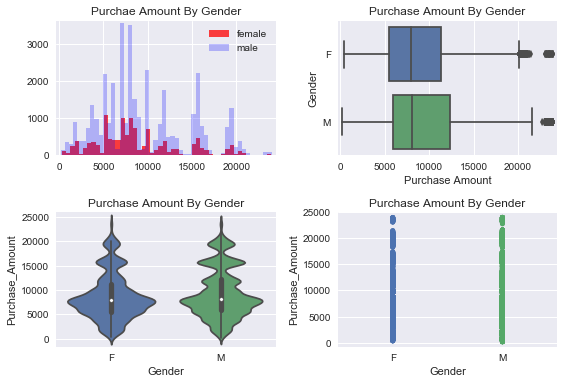

In [299]:
plt.gcf().clear()
import seaborn as sns
#Histogram of purchase amount by gender

plt.hist(female['Purchase_Amount'], bins = 50, alpha=.5, label='female', color='pink')

plt.subplot(2,2,1)
plt.hist(female['Purchase_Amount'], bins = 50, alpha=.75, label='female', color='red')
plt.hist(male['Purchase_Amount'], bins = 50, alpha=.25, label='male', color='blue')
plt.title('Purchae Amount By Gender')
plt.legend(loc = 'upper right')
plt.margins(.02)

#Box and whiskers of purchase amount by gender
plt.subplot(2,2,2)
sns.boxplot(x = 'Purchase_Amount', y = 'Gender', data=trainDf)
plt.xlabel('Purchase Amount')
plt.ylabel('Gender')
plt.title('Purchase Amount By Gender')
plt.margins(.02)

#Violin plot of purchase amount by gender
plt.subplot(2,2,3)
sns.violinplot(x='Gender', y='Purchase_Amount', data=trainDf)
plt.title('Purchase Amount By Gender')
plt.margins(.02)

# Strip plot of purchase amount by gender
plt.subplot(2,2,4)
sns.stripplot(x= 'Gender', y= 'Purchase_Amount', data = trainDf)
plt.title('Purchase Amount By Gender')
plt.margins(.02)

plt.tight_layout()

plt.show()

In [300]:
# Unable to run swarmplot
# Try both numerial..
import seaborn as sns
sns.swarmplot(x= 'Purchase_Amount', y= 'Gender_0_1', data = trainDf)
plt.show()

ValueError: Could not interpret input 'Gender_0_1'

In [301]:
def f(row):
    if row['Gender'] == 'M':
        val = 1
    else:
        val = 0
    return val

trainDf['Gender_0_1'] = trainDf.apply(f, axis=1)

plt.subplot(2,1,1)
sns.swarmplot(x= 'Gender_0_1', y= 'Purchase_Amount', data = trainDf)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


KeyboardInterrupt: 

### Statistics by Age Range

In [336]:
Age_0_17 = trainDf[trainDf['Age_0-17']==1]
Age_18_25 = trainDf[trainDf['Age_18-25']==1]
Age_26_35 = trainDf[trainDf['Age_26-35']==1]
Age_36_45 = trainDf[trainDf['Age_36-45']==1]
Age_46_50 = trainDf[trainDf['Age_46-50']==1]
Age_51_55 = trainDf[trainDf['Age_51-55']==1]
Age_55_plus = trainDf[trainDf['Age_55+']==1]

ages = [Age_0_17, Age_18_25, Age_26_35, Age_36_45, Age_46_50, Age_51_55, Age_55_plus]
agesStr = ['Age_0_17', 'Age_18_25', 'Age_26_35', 'Age_36_45', 'Age_46_50', 'Age_51_55', 'Age_55_plus']

ageStats = {}    
    
for a, b in zip(agesStr, ages):
    
    temp = {}

    temp['AveragePurchaseAmount'] = np.mean(b['Purchase_Amount'])

    temp['TotalPurchaseAmount'] = b.Purchase_Amount.sum()

    temp['NumberPurchases'] = b.Purchase_Amount.count()

    temp['AverageNumberPurchases'] = np.mean(b.groupby(by='User_ID')['Purchase_Amount'].count())

    ageStats[a] = temp
    

i = 0

for key, value in ageStats.items():
    
    print(key, "\n")
    print(ages[i].Purchase_Amount.describe(), "\n")
    i += 1
    
    for k, v in value.items():
        print(k, ": ", v)
    print('\n')    
        

Age_0_17 

count     1401.000000
mean      9094.816560
std       5091.135583
min        575.000000
25%       5353.000000
50%       8070.000000
75%      12074.000000
max      23847.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  9094.816559600285
TotalPurchaseAmount :  12741838
NumberPurchases :  1401
AverageNumberPurchases :  6.935643564356436


Age_18_25 

count     9390.000000
mean      9183.259957
std       4983.408975
min        347.000000
25%       5423.000000
50%       8015.500000
75%      12031.250000
max      23897.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  9183.259957401491
TotalPurchaseAmount :  86230811
NumberPurchases :  9390
AverageNumberPurchases :  9.542682926829269


Age_26_35 

count    19329.000000
mean      9271.560971
std       4961.555962
min        185.000000
25%       5837.000000
50%       8033.000000
75%      12021.000000
max      23956.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  92

### Visualization by Age Range

In [303]:
plt.gcf().clear()

plt.subplot(2,2,1)

ages = list(set(trainDf['Age']))
ages.sort()
holdAge = []
for ageRang in ages:
    temp = trainDf[trainDf['Age'] == ageRang]
    holdAge.append(temp)
    plt.hist(temp['Purchase_Amount'], bins=50, alpha=.5, label= ageRang)
    
plt.title('Purchase Amount By Age Range')
plt.xlabel('Purchase Amount')
plt.ylabel('Count')
plt.legend(loc = 'upper right')

plt.subplot(2,2,2)

NumPurchByAge = testDf.groupby(by='Age')['Purchase'].count()
NumPurchByAgeDf = pd.DataFrame(NumPurchByAge)
x= NumPurchByAgeDf.index
x = list(x)
y = list(NumPurchByAgeDf['Purchase'][:])
ax = sns.barplot(x= x, y= y, data=NumPurchByAgeDf)
ax.set(xlabel='Age Groups', ylabel='Number of purchases', title='Number of purchases by age')

plt.subplot(2,2,3)
AvgPurchByAge = testDf.groupby(by='Age')['Purchase'].mean()
x1= AvgPurchByAge.index
AvgPurchByAgeDf = pd.DataFrame(AvgPurchByAge)
x1 = list(x1)
y1 = list(AvgPurchByAgeDf['Purchase'][:])

ax = sns.barplot(x= x1, y= y1, data=AvgPurchByAgeDf)
ax.set(xlabel='Age Groups', ylabel='Average purchase amount', title='Average purchase amount by age')

plt.tight_layout()

plt.show()

KeyError: 'Column not found: Purchase'

### Statistics By Occupation

In [305]:
print(trainDf.columns[21:42]) #selects only occupation columns

Index(['0_Occupation', '1_Occupation', '2_Occupation', '3_Occupation',
       '4_Occupation', '5_Occupation', '6_Occupation', '7_Occupation',
       '8_Occupation', '9_Occupation', '10_Occupation', '11_Occupation',
       '12_Occupation', '13_Occupation', '14_Occupation', '15_Occupation',
       '16_Occupation', '17_Occupation', '18_Occupation', '19_Occupation',
       '20_Occupation'],
      dtype='object')


In [343]:
occupations = trainDf.columns[21:42]

OccupationDfs = {}
Occupationslst = []

for item in occupations:
    OccupationDfs[item] = trainDf[trainDf[item]==1]
    Occupationslst.append(trainDf[trainDf[item]==1])

OccupationStats = {}

for key, value in OccupationDfs.items():
    #loop through each occupation data frame
    #print(key, "\n \n", value.head())
    
    temp = {}

    temp['AveragePurchaseAmount'] = np.mean(value['Purchase_Amount'])

    temp['TotalPurchaseAmount'] = value.Purchase_Amount.sum()

    temp['NumberPurchases'] = value.Purchase_Amount.count()

    temp['AverageNumberPurchases'] = np.mean(value.groupby(by='User_ID')['Purchase_Amount'].count())

    OccupationStats[key] = temp

i = 0

for key, value in OccupationStats.items():
    print(key, "\n")
    
    print(Occupationslst[i].Purchase_Amount.describe(), "\n")
    i += 1
    
    
    for k, v in value.items():
        print(k, ": ", v)
    print('\n')

0_Occupation 

count     6249.000000
mean      9105.324852
std       4868.071300
min        371.000000
25%       5473.000000
50%       8004.000000
75%      11922.000000
max      23958.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  9105.324851976316
TotalPurchaseAmount :  56899175
NumberPurchases :  6249
AverageNumberPurchases :  9.71850699844479


1_Occupation 

count     4165.000000
mean      8905.612965
std       4684.829565
min        216.000000
25%       5845.000000
50%       7952.000000
75%      11603.000000
max      23899.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  8905.612965186074
TotalPurchaseAmount :  37091878
NumberPurchases :  4165
AverageNumberPurchases :  8.805496828752643


2_Occupation 

count     2385.000000
mean      8909.148008
std       4875.822321
min        368.000000
25%       5384.000000
50%       7932.000000
75%      11589.000000
max      23949.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmo

### Visualization By Occupation

### Statistics By City Category

In [351]:
citycat = trainDf.columns[42:45]

citycatDfs = {}
citycatLst = []

for item in citycat:
    citycatDfs[item] = trainDf[trainDf[item]==1]
    citycatLst.append(trainDf[trainDf[item]==1])
    
citycatStats = {}

for key, value in citycatDfs.items():
    #loop through each occupation data frame
    #print(key, "\n \n", value.head())
    
    temp = {}

    temp['AveragePurchaseAmount'] = np.mean(value['Purchase_Amount'])

    temp['TotalPurchaseAmount'] = value.Purchase_Amount.sum()

    temp['NumberPurchases'] = value.Purchase_Amount.count()

    temp['AverageNumberPurchases'] = np.mean(value.groupby(by='User_ID')['Purchase_Amount'].count())

    citycatStats[key] = temp
    
i = 0

for key, value in citycatStats.items():
    print(key, "\n")
    
    print(citycatLst[i].Purchase_Amount.describe(), "\n")
    i += 1
    
    
    for k, v in value.items():
        print(k, ": ", v)
    print('\n')

City_Category_A 

count    13873.000000
mean      8842.529446
std       4837.328960
min        185.000000
25%       5396.000000
50%       7903.000000
75%      11699.000000
max      23949.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  8842.529445685865
TotalPurchaseAmount :  122672411
NumberPurchases :  13873
AverageNumberPurchases :  14.199590583418628


City_Category_B 

count    20245.000000
mean      9214.819610
std       4927.921076
min        188.000000
25%       5471.000000
50%       8025.000000
75%      12015.000000
max      23948.000000
Name: Purchase_Amount, dtype: float64 

AveragePurchaseAmount :  9214.819609780192
TotalPurchaseAmount :  186554023
NumberPurchases :  20245
AverageNumberPurchases :  12.512360939431396


City_Category_C 

count    15006.000000
mean      9792.575636
std       5052.961051
min        187.000000
25%       6100.250000
50%       8597.500000
75%      13088.750000
max      23958.000000
Name: Purchase_Amount, dtype: float64 

Av

### Visualization By City Category